# Problem set 4


Alisha Jones 

CPES Data Replication

April 1, 2020 

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.

In [1]:
clear 
set more off 
capture log close using problemset4log.log 
use G10A G10B SEX HHINC ED4CAT AGE RANCEST D25 using "20240-0003-Data.dta", clear





(Collaborative Psychiatric Epidemiology Surveys (CPES), 2001-2003 [United States])


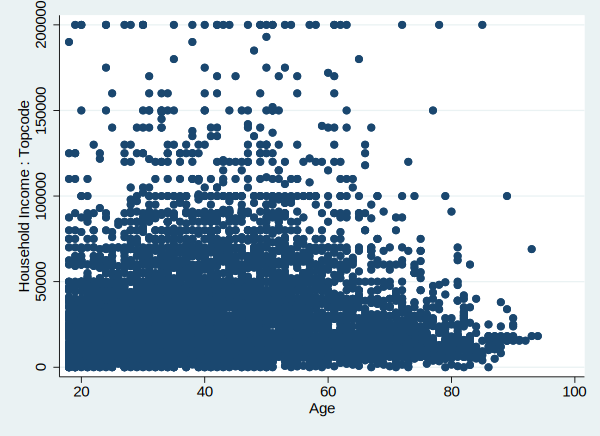

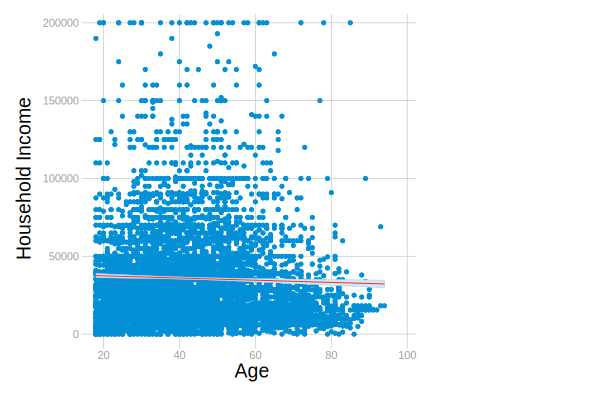

In [2]:
** A. 
scatter HHINC AGE

** B. 
tw (scatter HHINC AGE) ///
(lfitci HHINC AGE),  ///
ytitle(Household Income, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
aspect(1, place(west))

In [ ]:
** C. 
The distribution of the data in the graph appear to not be heteroscedastic. It doesn't seem to be heteroscedastic becasue the data doesn't really seem to create a cone shaped distribution. If it was e heteroscedastic it would take on a more apparent cone shape. 

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [3]:
** A.  
quietly regress HHINC AGE
estat hettest

** B. 
gen HHINCln=log(HHINC)
quietly regress HHINCln AGE
estat hettest




Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of HHINC

         chi2(1)      =     0.28
         Prob > chi2  =   0.5978

(61 missing values generated)



Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of HHINCln

         chi2(1)      =    33.95
         Prob > chi2  =   0.0000


In [ ]:
** B. 
Loging the dependent varibale increased heteroskedasticity, there was no heteroskedasticity before. It was not appropriate to log the dependent variable. 

## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [4]:
** A. 
quietly reg HHINC AGE 
quietly eststo

** B. 
quietly bootstrap _b[AGE] , rep(1000) nodots : ///
reg HHINC AGE
quietly eststo

In [ ]:
** C. 

In [5]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

In [ ]:
** D. 
The bootstrap procedure is reestimating the standard errors to better estimate resampling. It would not be useful to use the bootstrap procedure for my heteroskedastic free model.    

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [6]:
** A. 
quietly reg HHINC AGE, robust
quietly eststo

In [ ]:
** B. 

In [7]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

In [ ]:
** C. 
What the robust standard errors procedure is different from the conventional procedure because it produces a larger standard error than regular standard error. 

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

My model should not be estimated with cluster robust standard errors because my data does not measure individual units that are embedded within specific groups. The best form of standard error estimation for my model is regular standard errors because there seems to be no presence of heteroskedasticity. If there was heteroskedasticity present within the model I would have chosen robust standard errors in order to get a more accurate depiction of standard error estimation. 